In [ ]:
!python --version

Python 3.10.6


In [ ]:
!nvidia-smi

Wed Jul 26 05:50:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import mobilenet_v2

In [ ]:
# Hyperparameters
batch_size = 64
num_epochs = 20
learning_rate = 0.001

# Load Fashion MNIST dataset
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB with three channels
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [ ]:
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 26421880/26421880 [00:01<00:00, 15720745.23it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 272817.77it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5051349.24it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5554997.94it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
# Load pre-trained MobileNet model
model = mobilenet_v2(pretrained=True)
num_classes = 10  # Fashion MNIST has 10 classes
num_features = model.classifier[1].in_features

# Modify the classifier to fit the number of classes in Fashion MNIST
model.classifier[1] = nn.Linear(num_features, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 79.1MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

Epoch [1/20], Step [100/938], Loss: 0.3791
Accuracy: 81.75%
Epoch [1/20], Step [200/938], Loss: 0.3503
Accuracy: 84.71%
Epoch [1/20], Step [300/938], Loss: 0.1501
Accuracy: 86.16%
Epoch [1/20], Step [400/938], Loss: 0.4019
Accuracy: 87.16%
Epoch [1/20], Step [500/938], Loss: 0.1177
Accuracy: 87.66%
Epoch [1/20], Step [600/938], Loss: 0.1575
Accuracy: 88.11%
Epoch [1/20], Step [700/938], Loss: 0.3305
Accuracy: 88.49%
Epoch [1/20], Step [800/938], Loss: 0.2030
Accuracy: 88.81%
Epoch [1/20], Step [900/938], Loss: 0.1808
Accuracy: 89.05%
Epoch [2/20], Step [100/938], Loss: 0.3260
Accuracy: 92.66%
Epoch [2/20], Step [200/938], Loss: 0.3561
Accuracy: 92.26%
Epoch [2/20], Step [300/938], Loss: 0.1552
Accuracy: 91.96%
Epoch [2/20], Step [400/938], Loss: 0.1174
Accuracy: 92.16%
Epoch [2/20], Step [500/938], Loss: 0.2389
Accuracy: 92.19%
Epoch [2/20], Step [600/938], Loss: 0.4070
Accuracy: 92.19%
Epoch [2/20], Step [700/938], Loss: 0.1604
Accuracy: 92.24%
Epoch [2/20], Step [800/938], Loss: 0.24

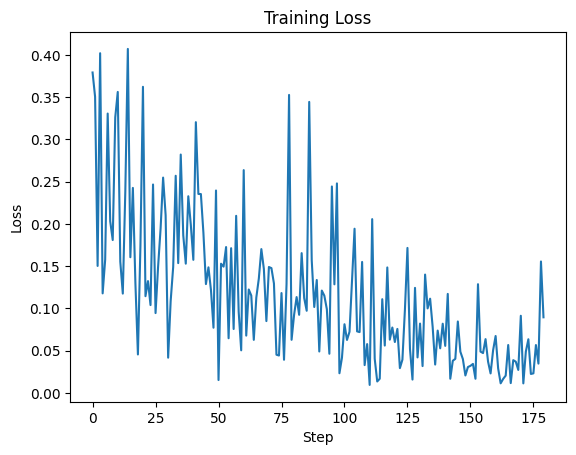

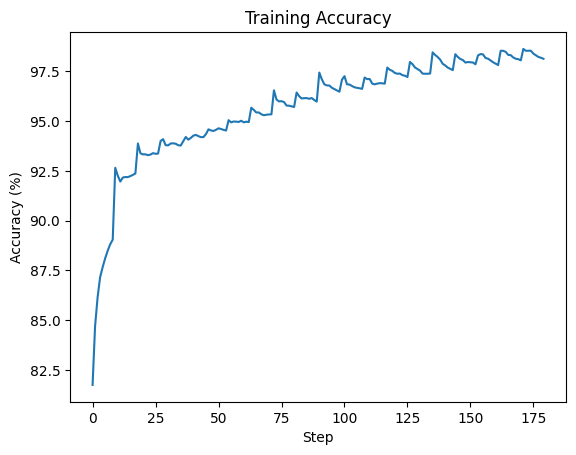

In [ ]:
import matplotlib.pyplot as plt

total_step = len(train_loader)
loss_values = []
accuracy_values = []

for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_samples += labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == labels).sum().item()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_step}], Loss: {loss.item():.4f}")
            accuracy = 100 * total_correct / total_samples
            print(f"Accuracy: {accuracy:.2f}%")

            loss_values.append(loss.item())
            accuracy_values.append(accuracy)

# Plot the loss graph
plt.plot(loss_values)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Plot the accuracy graph
plt.plot(accuracy_values)
plt.xlabel('Step')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.show()

In [ ]:
all_predictions = []
all_labels = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


Confusion Matrix:
[[901   0  24  19   2   0  51   0   3   0]
 [  0 987   0   8   1   0   3   0   1   0]
 [ 13   1 926   9  31   0  20   0   0   0]
 [  8   0   6 962  14   0  10   0   0   0]
 [  1   1  22  27 930   0  19   0   0   0]
 [  0   0   0   0   0 991   0   8   0   1]
 [ 85   0  54  26  58   0 773   0   4   0]
 [  0   0   0   0   0   4   0 976   0  20]
 [  0   0   0   1   0   2   3   1 992   1]
 [  0   0   0   0   0   5   0  21   1 973]]


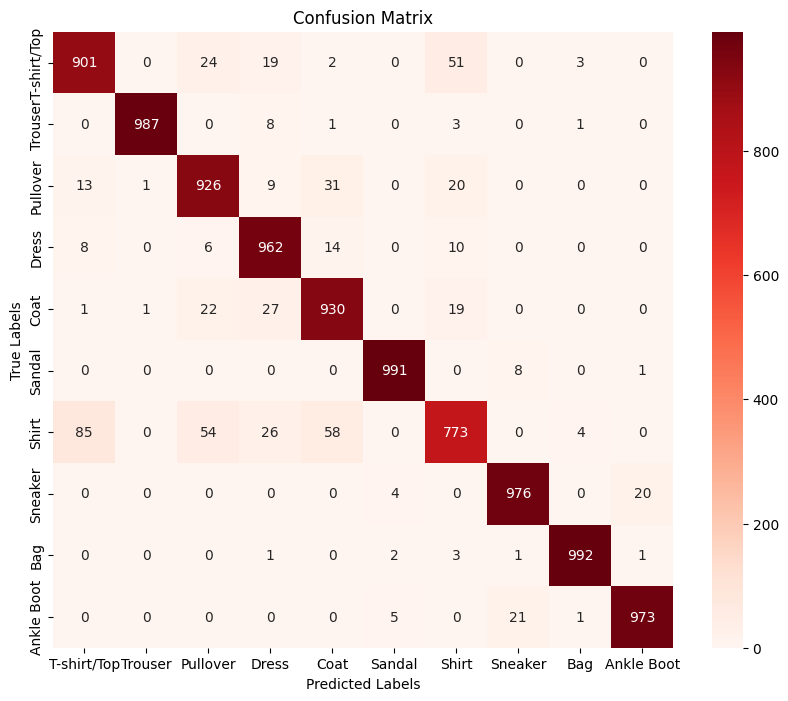

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


# Assuming you have `predictions_l` and `labels_l` containing the predicted labels and ground truth labels, respectively

# Create the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Alternatively, you can visualize the confusion matrix using a heatmap (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of class names
classes = ["T-shirt/Top", "Trouser", "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle Boot"]  # Replace with your actual class names

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()